In [1]:
import matplotlib.pyplot as plt
import cv2

In [2]:
cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')

In [3]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

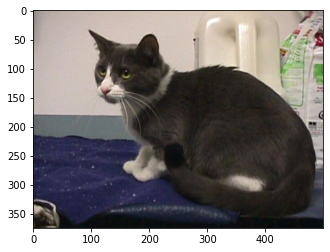

In [4]:
plt.imshow(cat4)

In [5]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [6]:
imagen_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest',
                               )

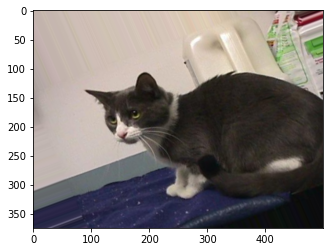

In [7]:
plt.imshow(imagen_gen.random_transform(cat4))

In [8]:
imagen_gen.flow_from_directory('CATS_DOGS/train/')

Found 18743 images belonging to 2 classes.


In [9]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Dense,Flatten,Conv2D,MaxPooling2D

In [10]:
input_shape = (150,150,3)

In [11]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))

model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [13]:
batch_size = 16

train_image_gen = imagen_gen.flow_from_directory('CATS_DOGS/train/',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 18743 images belonging to 2 classes.


In [14]:
test_image_gen = imagen_gen.flow_from_directory('CATS_DOGS/test/',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 6253 images belonging to 2 classes.


In [15]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [16]:
results = model.fit_generator(train_image_gen,epochs=10,validation_data=test_image_gen)

Epoch 1/10
 781/1172 [==================>...........] - ETA: 1:26 - loss: 0.6897 - accuracy: 0.5458

/opt/anaconda3/envs/opencv/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/opt/anaconda3/envs/opencv/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/opt/anaconda3/envs/opencv/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/opt/anaconda3/envs/opencv/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/opt/anaconda3/envs/opencv/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:7

1172/1172 [==============================] - 313s 267ms/step - loss: 0.6874 - accuracy: 0.5531 - val_loss: 0.7925 - val_accuracy: 0.5017
Epoch 2/10
1172/1172 [==============================] - 309s 264ms/step - loss: 0.6504 - accuracy: 0.6243 - val_loss: 0.6249 - val_accuracy: 0.6485
Epoch 3/10
1172/1172 [==============================] - 305s 260ms/step - loss: 0.6068 - accuracy: 0.6771 - val_loss: 0.6101 - val_accuracy: 0.7094
Epoch 4/10
1172/1172 [==============================] - 305s 260ms/step - loss: 0.5661 - accuracy: 0.7112 - val_loss: 0.3576 - val_accuracy: 0.7516
Epoch 5/10
1172/1172 [==============================] - 306s 261ms/step - loss: 0.5311 - accuracy: 0.7355 - val_loss: 0.3665 - val_accuracy: 0.7245
Epoch 6/10
1172/1172 [==============================] - 302s 258ms/step - loss: 0.5050 - accuracy: 0.7582 - val_loss: 0.4618 - val_accuracy: 0.7867
Epoch 7/10
1172/1172 [==============================] - 306s 261ms/step - loss: 0.4783 - accuracy: 0.7713 - val_loss: 0.686

In [17]:
results.history

{'val_loss': [0.7925087213516235,
  0.6249460577964783,
  0.6100590229034424,
  0.35764625668525696,
  0.36649736762046814,
  0.46177804470062256,
  0.6859630346298218,
  0.36874622106552124,
  0.517849326133728,
  0.3895965814590454],
 'val_accuracy': [0.5016791820526123,
  0.6484887003898621,
  0.7094194889068604,
  0.751639187335968,
  0.7244522571563721,
  0.7866623997688293,
  0.7991364002227783,
  0.801215410232544,
  0.8116104006767273,
  0.8228050470352173],
 'loss': [0.6873992346415988,
  0.650473769265827,
  0.6065570516672294,
  0.5660336316251986,
  0.5310716973973943,
  0.5050151124680073,
  0.47823841761787134,
  0.45789862452954877,
  0.44044629181550127,
  0.4318295116708989],
 'accuracy': [0.5530598,
  0.62433976,
  0.6770528,
  0.71119887,
  0.7354746,
  0.7582031,
  0.771328,
  0.7855733,
  0.799872,
  0.80366004]}

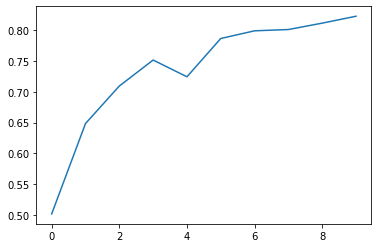

In [18]:
plt.plot(results.history['val_accuracy'])

In [19]:
from keras.preprocessing import image

In [20]:
dog_img = image.load_img('CATS_DOGS/test/DOG/10005.jpg',target_size=(150,150))

In [21]:
dog_img = image.img_to_array(dog_img)

In [22]:
import numpy as np

In [23]:
dog_img = np.expand_dims(dog_img,axis=0)

In [24]:
dog_img.shape

(1, 150, 150, 3)

In [25]:
dog_img = dog_img/255

In [26]:
model.predict_classes(dog_img)

array([[1]], dtype=int32)

In [27]:
model.predict(dog_img)

array([[0.81798995]], dtype=float32)

In [28]:
cat = image.load_img('CATS_DOGS/test/CAT/11304.jpg',target_size=(150,150))

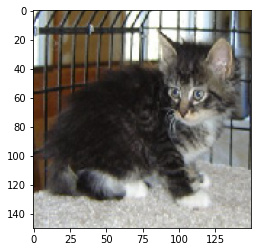

In [29]:
plt.imshow(cat)

In [30]:
cat = image.img_to_array(cat)
cat = np.expand_dims(cat,axis=0)
cat = cat/255
model.predict_classes(cat)


array([[0]], dtype=int32)

In [31]:
model.predict(cat)

array([[0.08304816]], dtype=float32)

In [32]:
cat1 = image.load_img('CATS_DOGS/test/cat1.jpeg',target_size=(150,150))
cat2 = image.load_img('CATS_DOGS/test/cat2.jpeg',target_size=(150,150))
cat3 = image.load_img('CATS_DOGS/test/cat3.jpeg',target_size=(150,150))
cat5 = image.load_img('CATS_DOGS/test/cat5.jpeg',target_size=(150,150))
dog1 = image.load_img('CATS_DOGS/test/dog1.jpeg',target_size=(150,150))

In [33]:
def example(photo):
    photo = image.img_to_array(photo)
    photo = np.expand_dims(photo,axis=0)
    photo = photo/255
    print(model.predict_classes(photo))
    #print(model.predict(cat1))

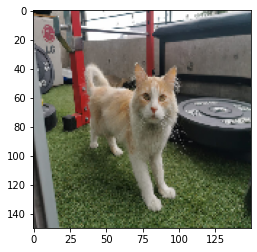

In [34]:
plt.imshow(cat1)

In [35]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [36]:
example(cat1)

[[1]]


In [37]:
example(cat2)

[[1]]


In [38]:
example(cat3)

[[1]]


In [39]:
example(dog1)

[[0]]


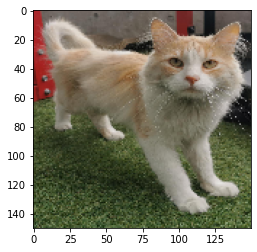

In [40]:
plt.imshow(cat5)

In [41]:
example(cat5)

[[1]]
